In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("./cic_ids_smote03_pca25.csv")
#df = pd.read_csv("/Users/anchanghun/Downloads/CIC-Dataset/cleaned_improved_cicids2017.csv")

In [4]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,label
0,3.755787,-1.071812,2.930933,-2.446960,3.825755,-6.790677,-9.097402,3.715448,-1.080617,0.002021,...,-2.334503,-1.591972,-0.751660,-0.430237,-0.189769,0.992952,-3.140185,3.106113,-0.005396,0
1,4.255976,-3.447895,-2.044386,0.607399,1.420579,0.635792,-1.034094,-1.987434,-2.420484,0.016586,...,0.399538,0.307386,0.392462,0.045101,0.053932,-0.531625,0.367233,-0.001627,0.483978,0
2,7.099579,-0.328671,15.021956,-4.085954,4.485459,-6.750818,-1.245696,12.284609,-12.470846,0.073562,...,-4.114029,2.403140,14.790264,-0.072217,-5.309932,-2.786611,9.262720,5.324074,-3.618367,0
3,5.499027,-2.232074,0.323932,-0.687445,3.269052,-1.383862,-6.764744,0.350936,-4.496568,0.037441,...,4.034838,2.231003,-0.575002,0.090285,1.567744,0.082298,-0.482082,1.259168,1.329641,0
4,5.595111,-2.244346,0.295866,-0.677989,3.272865,-1.382852,-6.767350,0.317522,-4.523027,0.037608,...,4.032456,2.232305,-0.571224,0.090600,1.565802,0.073913,-0.477891,1.255216,1.337643,0


In [5]:
df['label'].value_counts()

label
0    1594540
6     159454
8     159454
5     159454
4     159454
3     159454
2     159454
7     159454
1     159454
Name: count, dtype: int64

In [6]:
len(df.columns)

26

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((2583154, 26), (287018, 26))

In [8]:
X_train_normal = X_train[X_train['label'] == 0]
X_train_normal.shape

(1435279, 26)

In [9]:
X_test.shape

(287018, 26)

In [10]:
y_test = X_test['label']
X_test = X_test.drop(labels='label',axis=1)

In [11]:
y_train_normal = X_train_normal['label']
X_train_normal = X_train_normal.drop(labels='label', axis=1)

In [12]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector, Conv1D, Conv1DTranspose
from keras.models import Model
from keras import regularizers
from keras_self_attention import SeqWeightedAttention, SeqSelfAttention
from keras.callbacks import EarlyStopping

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Model, Input
import numpy as np
from tensorflow.keras import backend as K
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ 클래스 개수 설정 (총 9개: 정상 + 8개 공격)
num_classes = 9

# ✅ 잠재 차원 및 중간 차원 설정
latent_dim = 10
inter_dim = 20

# ✅ 샘플링 함수 (재매개변수화 트릭 사용) -> 안정적인 샘플링 적용
def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0]
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(0.5 * K.clip(z_log_sigma, -10, 10)) * epsilon  # NaN 방지

# ✅ 안정적인 VAE 손실 함수 (NaN 방지)
def vae_loss(x, x_decoded_mean, z_mean, z_log_sigma):
    reconstruction_loss = K.mean(K.square(x - x_decoded_mean) + 1e-10)  # NaN 방지
    kl_loss = -0.5 * K.sum(1 + K.clip(z_log_sigma, -10, 10) - K.square(z_mean) - K.exp(K.clip(z_log_sigma, -10, 10)), axis=-1)  # 안정화
    kl_loss_weighted = kl_loss * 0.0001  # KL 손실 가중치 적용
    total_loss = K.mean(reconstruction_loss + kl_loss_weighted)
    return total_loss

# ✅ CNN-Based CVAE 모델 정의
def cvae(X):
    features = X.shape[1]  # 특징 수
    input_x = Input(shape=(features,), name='InputFeatures')  

    # CNN 기반 인코더
    reshaped_input = layers.Reshape((features, 1))(input_x)  # 1D Conv 사용을 위한 차원 변환
    h = layers.Conv1D(filters=64, kernel_size=3, activation="relu", padding='same')(reshaped_input)
    h = layers.Conv1D(filters=32, kernel_size=3, activation="relu", padding='same')(h)
    h = layers.Conv1D(filters=16, kernel_size=3, activation="relu", padding='same')(h)
    h = layers.Flatten()(h)
    h = layers.Dense(inter_dim, activation='relu')(h)

    # 잠재 공간
    z_mean = layers.Dense(latent_dim, name='z_mean')(h)
    z_log_sigma = layers.Dense(latent_dim, name='z_log_sigma')(h)
    z = layers.Lambda(sampling, name='z')([z_mean, z_log_sigma])

    # 디코더
    decoder1 = layers.Dense(features * inter_dim)(z)
    decoder1 = layers.Reshape((features, inter_dim))(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=16, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=32, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=64, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Flatten()(decoder1)
    decoder1 = layers.Dense(features, activation='sigmoid')(decoder1)  # 최종 복원

    model = Model(input_x, decoder1)
    model.add_loss(vae_loss(input_x, decoder1, z_mean, z_log_sigma))

    return model

# ✅ 정상 데이터만 학습
model = cvae(X_train_normal)  # 정상 데이터로만 학습
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_normal, X_train_normal,
                    shuffle=True, epochs=50, validation_split=0.1, batch_size=32,
                    callbacks=[early_stopping])



Epoch 1/50
40368/40368 [==============================] - 171s 4ms/step - loss: 2.6999 - accuracy: 0.8827 - val_loss: 2.0547 - val_accuracy: 0.8885
Epoch 2/50
40368/40368 [==============================] - 165s 4ms/step - loss: 2.6727 - accuracy: 0.8987 - val_loss: 2.0444 - val_accuracy: 0.9094
Epoch 3/50
40368/40368 [==============================] - 163s 4ms/step - loss: 2.6681 - accuracy: 0.9031 - val_loss: 2.0427 - val_accuracy: 0.9067
Epoch 4/50
40368/40368 [==============================] - 165s 4ms/step - loss: 2.6669 - accuracy: 0.9003 - val_loss: 2.0417 - val_accuracy: 0.9051
Epoch 5/50
40368/40368 [==============================] - 162s 4ms/step - loss: 2.6640 - accuracy: 0.8980 - val_loss: 2.0391 - val_accuracy: 0.9115
Epoch 6/50
40368/40368 [==============================] - 165s 4ms/step - loss: 2.6633 - accuracy: 0.8954 - val_loss: 2.0380 - val_accuracy: 0.9057
Epoch 7/50
40368/40368 [==============================] - 164s 4ms/step - loss: 2.6633 - accuracy: 0.9000 - val_

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_shapes.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
# ✅ X_test 데이터로 CVAE 복원 예측 수행
X_pred = model.predict(X_test)

# ✅ 복원 오류 (MSE) 계산
reconstruction_errors = np.mean(np.square(X_test - X_pred), axis=1)

# ✅ error_df 생성 (실제 라벨 포함)
error_df = pd.DataFrame({
    'reconstruction_error': reconstruction_errors,
    'true_class': y_test  # 실제 라벨 (0: 정상, 1~8: 공격)
})

# ✅ IQR 기반 Threshold 설정 (이상 탐지를 위한 임계값 결정)
Q1 = np.percentile(error_df['reconstruction_error'], 25)
Q3 = np.percentile(error_df['reconstruction_error'], 75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR  # 일반적인 이상 탐지 기준

# ✅ Threshold 기반 분류 (정상: 0, 이상: 1)
error_df['pred_class'] = (error_df['reconstruction_error'] > threshold).astype(int)



8970/8970 [==============================] - 12s 1ms/step


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# ✅ Confusion Matrix 출력
cm = confusion_matrix(error_df['true_class'] > 0, error_df['pred_class'])  # 정상 vs 공격
print("Confusion Matrix:\n", cm)

# ✅ Classification Report 출력
print("Classification Report:\n", classification_report(error_df['true_class'] > 0, error_df['pred_class']))

Confusion Matrix:
 [[150483   8778]
 [ 92172  35585]]
Classification Report:
               precision    recall  f1-score   support

       False       0.62      0.94      0.75    159261
        True       0.80      0.28      0.41    127757

    accuracy                           0.65    287018
   macro avg       0.71      0.61      0.58    287018
weighted avg       0.70      0.65      0.60    287018



In [17]:
error_df

,reconstruction_error,true_class,pred_class
1586856,2.000795,1,0
146821,0.675321,0,0
301814,0.358603,0,0
193979,0.171642,0,0
202567,0.592379,0,0
...,...,...,...
2445725,3.607769,5,1
1258801,44.974897,0,1
629394,0.443338,0,0
1122026,3.864216,0,1


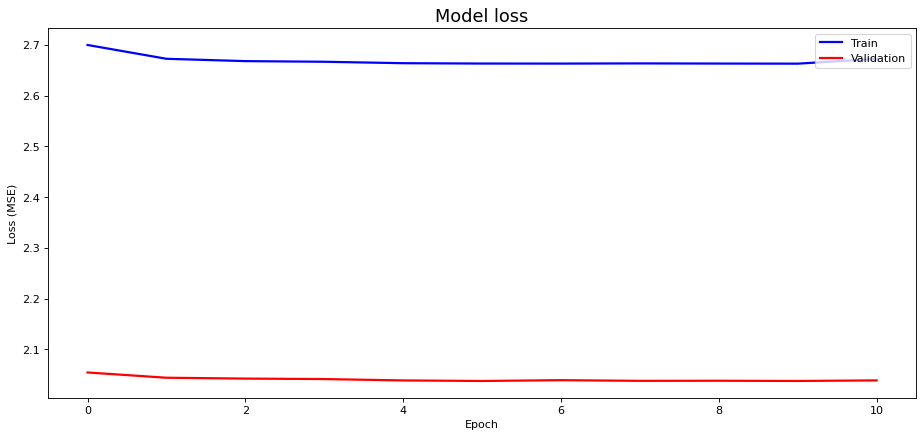

In [18]:
# Plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (MSE)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [19]:
import pandas as pd
import numpy as np

# ✅ X_test 데이터로 CVAE 복원 예측 수행
X_pred = model.predict(X_test)

# ✅ 복원 오류 (MSE) 계산
reconstruction_errors = np.mean(np.square(X_test - X_pred), axis=1)

# ✅ error_df 생성 (실제 라벨 포함)
error_df = pd.DataFrame({
    'reconstruction_error': reconstruction_errors,
    'true_class': y_test  # 0 (정상) ~ 8 (각 공격)
})

# ✅ 클래스별 Threshold 설정 (IQR 방식)
thresholds = {}
for label in range(9):  # 0 (정상) ~ 8 (각 공격)
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error']
    Q1 = np.percentile(class_errors, 25)
    Q3 = np.percentile(class_errors, 75)
    IQR = Q3 - Q1
    thresholds[label] = Q3 + 1.5 * IQR  # 이상 탐지 기준

# ✅ Threshold 기반 공격 분류 (최소 차이 기준)
def classify_error(error_value):
    min_diff = float('inf')
    best_class = 0  # 기본값은 정상
    for cls, thresh in thresholds.items():
        diff = abs(error_value - thresh)
        if diff < min_diff:
            min_diff = diff
            best_class = cls
    return best_class

error_df['pred_class'] = error_df['reconstruction_error'].apply(classify_error)



8970/8970 [==============================] - 12s 1ms/step


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# ✅ Confusion Matrix 출력
cm = confusion_matrix(error_df['true_class'], error_df['pred_class'])
print("Confusion Matrix:\n", cm)

# ✅ Classification Report 출력
print("Classification Report:\n", classification_report(error_df['true_class'], error_df['pred_class']))

Confusion Matrix:
 [[  3407   1193   1571   4883   1499   2487  11707   6390 126124]
 [   257   1147    251   6106      0      1   7959     63     64]
 [   112   1265    878   4582    220     16   5322    102   3528]
 [    21    273     90   5119      0      0  10481      4      1]
 [     0   3818   8242    553    645      0     16      2   2658]
 [    28   4299    100   3925   4305    178    705     63   2469]
 [     0      0      0      0      0      0  15870      0     87]
 [   251     26     47    146     36    118   1227    545  13493]
 [    76      2      0     10      0      0     80    101  15774]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.02      0.04    159261
           1       0.10      0.07      0.08     15848
           2       0.08      0.05      0.06     16025
           3       0.20      0.32      0.25     15989
           4       0.10      0.04      0.06     15934
           5       0.06      0.01    

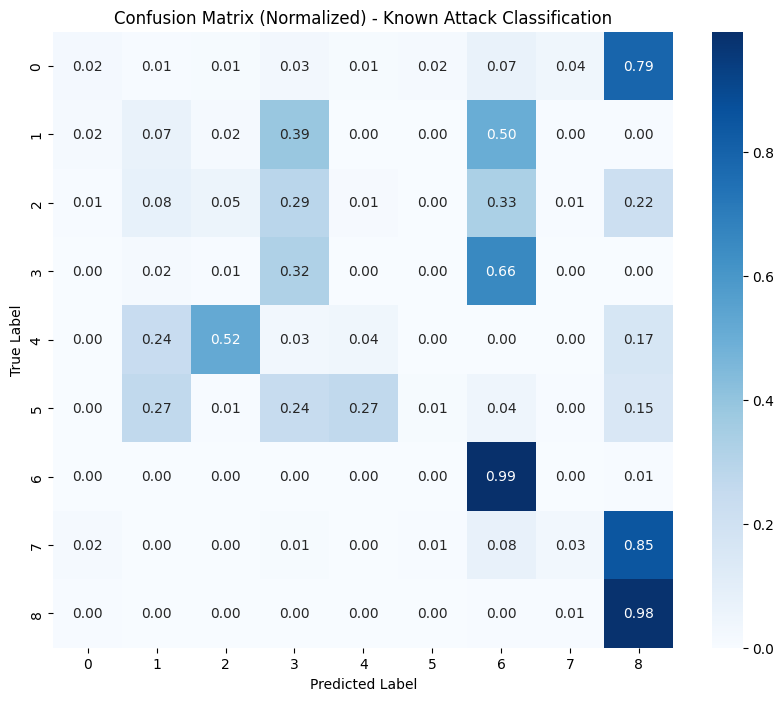

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ✅ 실제 라벨과 예측 라벨 가져오기
y_true = error_df['true_class'].values  # 실제 라벨
y_pred = error_df['pred_class'].values  # 예측 라벨

# ✅ "Unknown" 공격을 제외하고 정상 + 8개 공격으로 필터링
valid_classes = list(range(9))  # 0 (정상) ~ 8 (공격 클래스)
mask = np.isin(y_true, valid_classes)  # Unknown 제외
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# ✅ 혼동 행렬 계산
cm = confusion_matrix(y_true_filtered, y_pred_filtered, labels=valid_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 정규화

# ✅ 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=valid_classes, yticklabels=valid_classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - Known Attack Classification")
plt.show()

In [22]:
from scipy.stats import genpareto
import numpy as np

# ✅ 클래스별 reconstruction error 분포 모델링 (EVT 적용)
thresholds = {}

for label in range(9):  # 정상(0) + 공격(1~8)
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error'].values
    
    if len(class_errors) > 10:  # 최소 샘플 개수 확인
        # ✅ EVT 적용 (Generalized Pareto Distribution - GPD)
        shape, loc, scale = genpareto.fit(class_errors)
        
        # ✅ Threshold 설정 (논문에서는 평균 초과 임곗값 사용)
        thresholds[label] = loc + (scale / (1 - shape))  # EVT 임계값 계산
    else:
        thresholds[label] = np.percentile(class_errors, 95)  # 샘플 부족 시 Percentile 사용

print("📌 EVT 기반 Threshold 값:", thresholds)

📌 EVT 기반 Threshold 값: {0: 1.064124197861768, 1: 2.1215735997512466, 2: 2.081805037340466, 3: 1.8204165556483238, 4: 4.444981105103542, 5: 5.038471581006711, 6: 0.6796787438257781, 7: 0.7630419274268876, 8: 0.7483414054134274}


In [23]:
# ✅ EVT 기반 분류 함수
def classify_error_evt(error_value):
    min_diff = float('inf')
    best_class = 0  # 기본값 (정상)
    
    for cls, thresh in thresholds.items():
        diff = abs(error_value - thresh)
        if diff < min_diff:
            min_diff = diff
            best_class = cls
            
    return best_class

# ✅ error_df에 새로운 EVT 기반 예측 클래스 추가
error_df['pred_class_evt'] = error_df['reconstruction_error'].apply(classify_error_evt)


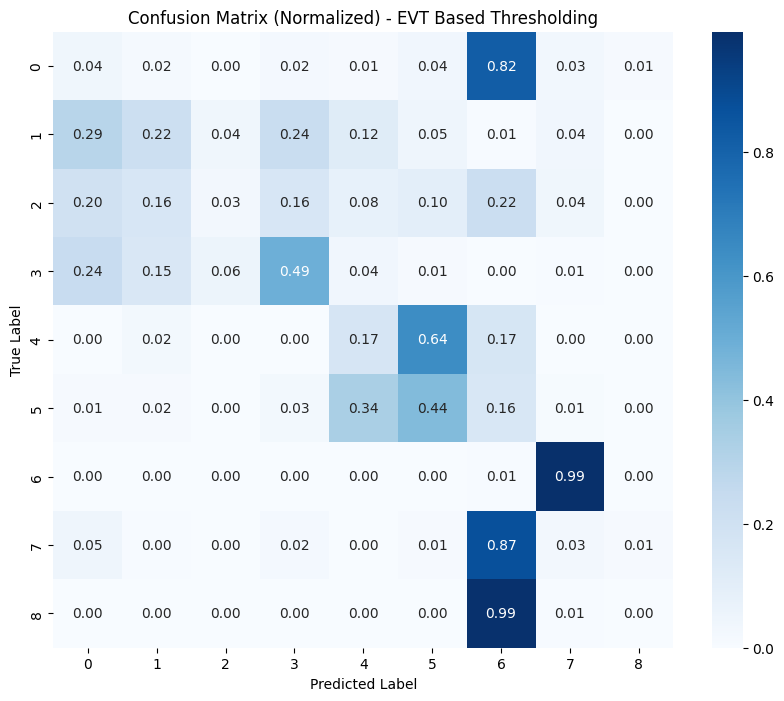

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ✅ 실제 라벨과 EVT 예측 라벨 가져오기
y_true = error_df['true_class'].values
y_pred_evt = error_df['pred_class_evt'].values

# ✅ 혼동 행렬 생성
cm = confusion_matrix(y_true, y_pred_evt, labels=list(range(9)))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 정규화

# ✅ 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(range(9)), yticklabels=list(range(9)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - EVT Based Thresholding")
plt.show()

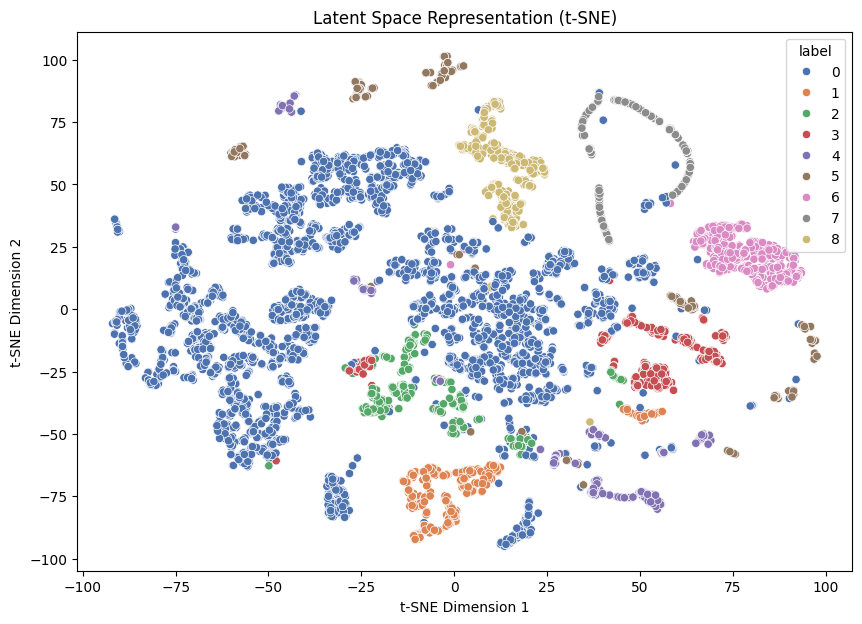

In [25]:
import numpy as np
import tensorflow.keras.backend as K
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ 모델에서 z_mean 추출 함수 정의
z_mean_layer = model.get_layer("z_mean")
z_mean_function = K.function([model.input], [z_mean_layer.output])

# ✅ 미니배치(batch)로 z_mean 추출 (OOM 방지)
batch_size = 1024  # ✅ 메모리 절약을 위해 작은 배치 크기 사용
z_mean_list = []

for i in range(0, len(X_test), batch_size):
    batch = X_test[i:i+batch_size]
    z_mean_batch = z_mean_function([batch])[0]
    z_mean_list.append(z_mean_batch)

# ✅ NumPy 배열로 변환
z_mean_values = np.vstack(z_mean_list)

# ✅ X_test 크기 줄이기 (최대 10,000개 샘플만 사용)
sample_size = min(10000, len(z_mean_values))  # 10,000개 이하로 제한
z_mean_sampled = z_mean_values[:sample_size]
y_test_sampled = y_test[:sample_size]

# ✅ t-SNE 적용 (X_test 샘플 수보다 perplexity가 작아야 함)
tsne = TSNE(n_components=2, perplexity=min(30, len(z_mean_sampled)-1), random_state=42)
z_tsne = tsne.fit_transform(z_mean_sampled)

# ✅ t-SNE 결과 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x=z_tsne[:, 0], y=z_tsne[:, 1], hue=y_test_sampled, palette="deep")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("Latent Space Representation (t-SNE)")
plt.show()

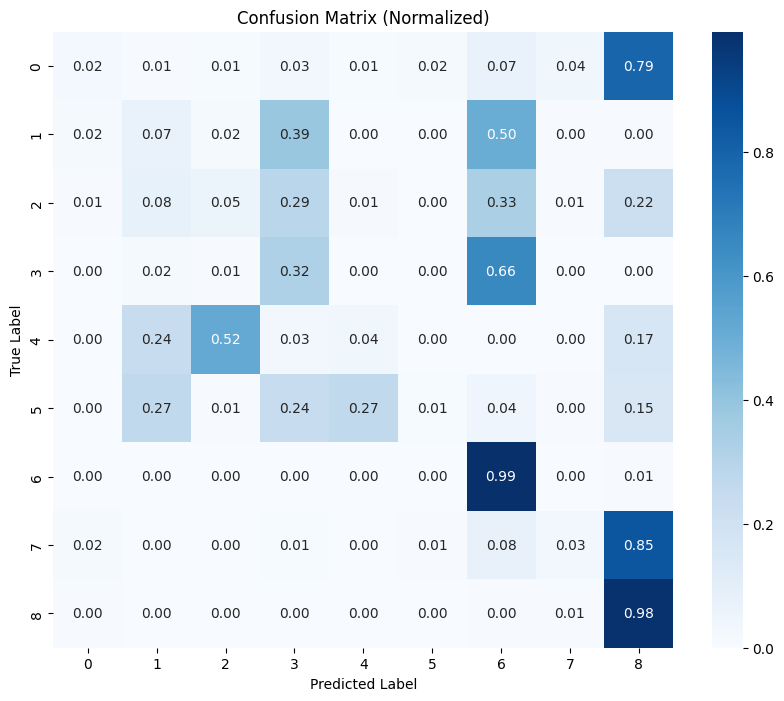

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ✅ 실제 라벨과 예측 라벨 가져오기
y_true = error_df['true_class'].values
y_pred = error_df['pred_class'].values

# ✅ 혼동 행렬 생성
cm = confusion_matrix(y_true, y_pred, labels=list(range(9)))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 정규화

# ✅ 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(range(9)), yticklabels=list(range(9)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized)")
plt.show()

In [27]:
from scipy.stats import genpareto
import numpy as np

thresholds = {}

for label in range(9):  # 0(정상) + 8개 공격
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error'].values
    
    if len(class_errors) > 10:  # 최소 샘플 개수 확인
        shape, loc, scale = genpareto.fit(class_errors)
        thresholds[label] = loc + (scale / (1 - shape))  # EVT 기반 threshold 설정
    else:
        thresholds[label] = np.percentile(class_errors, 95)  # 데이터 부족 시 percentile 적용

print("📌 EVT 기반 Threshold 값:", thresholds)

📌 EVT 기반 Threshold 값: {0: 1.064124197861768, 1: 2.1215735997512466, 2: 2.081805037340466, 3: 1.8204165556483238, 4: 4.444981105103542, 5: 5.038471581006711, 6: 0.6796787438257781, 7: 0.7630419274268876, 8: 0.7483414054134274}


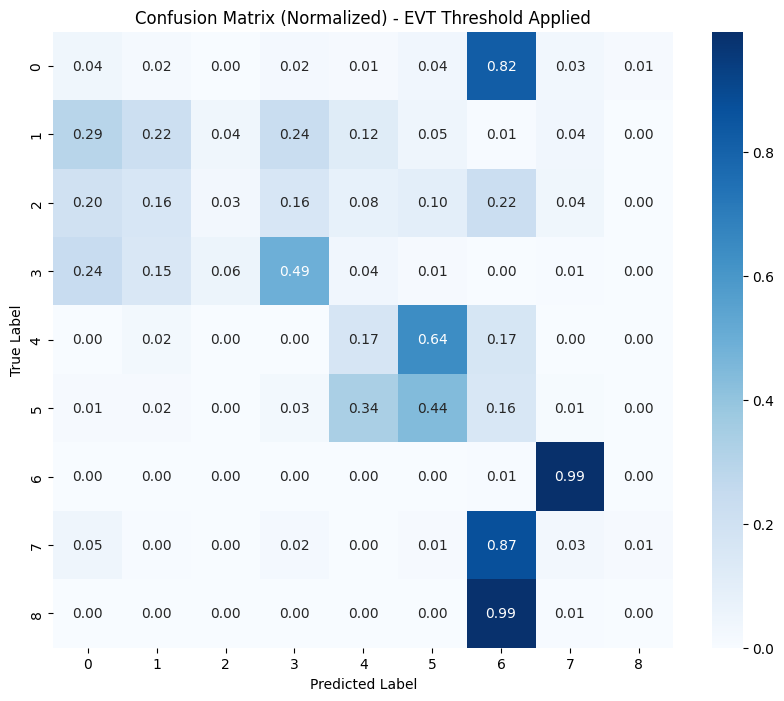

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ✅ 새로운 EVT 기반 threshold 적용 후 예측 수행
error_df['pred_class_evt'] = error_df['reconstruction_error'].apply(lambda x: classify_error_evt(x))

# ✅ Confusion Matrix 생성
cm = confusion_matrix(error_df['true_class'], error_df['pred_class_evt'], labels=list(range(9)))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 정규화

# ✅ Confusion Matrix 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(range(9)), yticklabels=list(range(9)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - EVT Threshold Applied")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


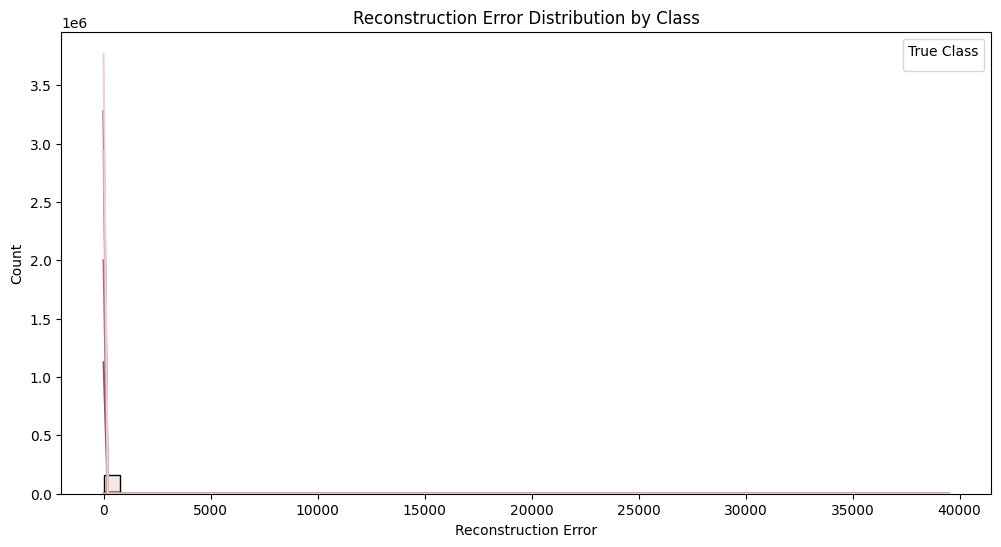

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(data=error_df, x="reconstruction_error", hue="true_class", bins=50, kde=True)
plt.xlabel("Reconstruction Error")
plt.ylabel("Count")
plt.title("Reconstruction Error Distribution by Class")
plt.legend(title="True Class")
plt.show()

In [30]:
thresholds = {}

for label in range(9):  # 0(정상) + 8개 공격
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error'].values
    
    if len(class_errors) > 10:  # 최소 샘플 개수 확인
        thresholds[label] = np.percentile(class_errors, 98)  # 클래스별 최적 Percentile 설정
    else:
        thresholds[label] = np.percentile(error_df['reconstruction_error'], 98)  # 전체 데이터 기반 설정

print("📌 새롭게 계산된 Threshold 값:", thresholds)

📌 새롭게 계산된 Threshold 값: {0: 10.833479267233898, 1: 5.471789535247676, 2: 7.640811411424759, 3: 4.065642522061923, 4: 8.368099391146364, 5: 13.718560373827252, 6: 0.8635290748602823, 7: 2.090879106827223, 8: 0.644197680500971}


In [31]:
def classify_error_dynamic(error_value):
    min_diff = float('inf')
    best_class = 0  # 기본값 (정상)
    
    for cls, thresh in thresholds.items():
        diff = abs(error_value - thresh)
        if diff < min_diff:
            min_diff = diff
            best_class = cls
            
    return best_class

# ✅ 새로운 분류 적용
error_df['pred_class_dynamic'] = error_df['reconstruction_error'].apply(classify_error_dynamic)

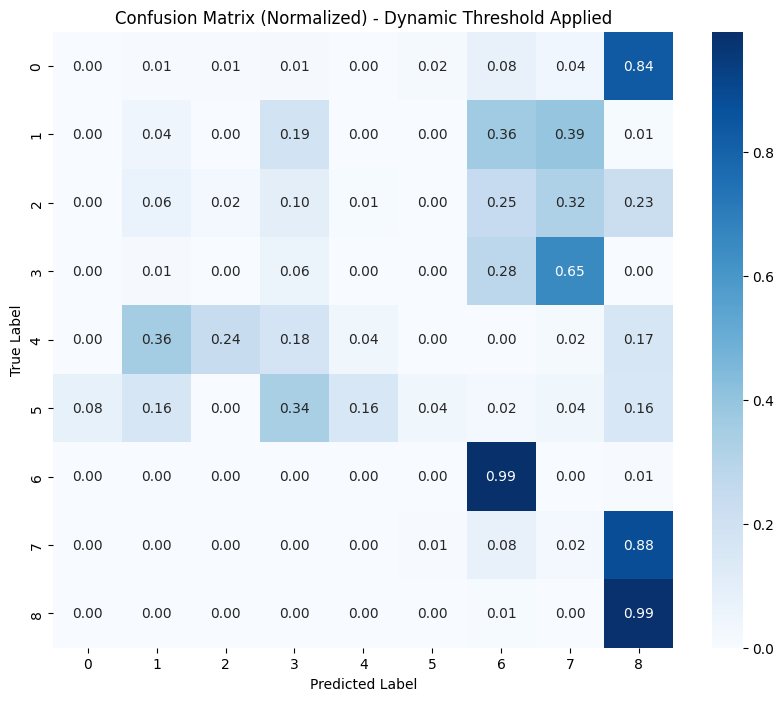

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ✅ 새로운 분류 결과 기반 혼동 행렬 생성
cm = confusion_matrix(error_df['true_class'], error_df['pred_class_dynamic'], labels=list(range(9)))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 정규화

# ✅ 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(range(9)), yticklabels=list(range(9)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - Dynamic Threshold Applied")
plt.show()

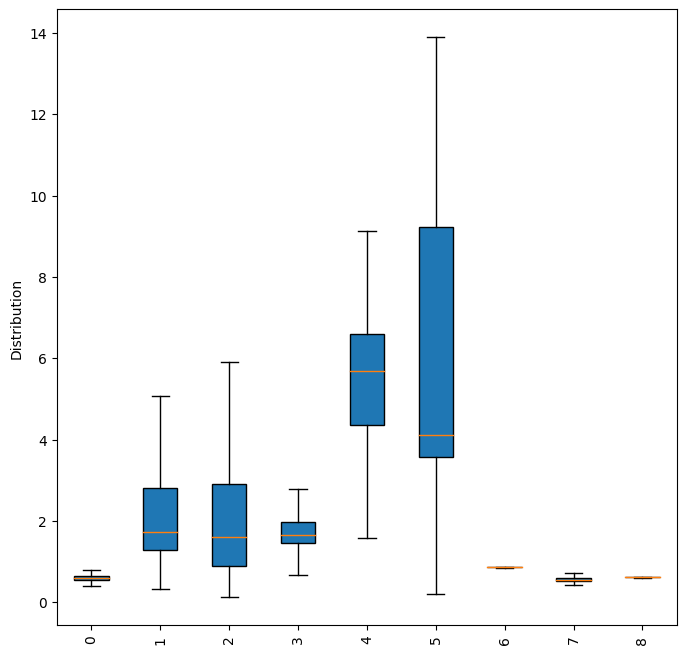

In [33]:
import matplotlib.pyplot as plt

# 데이터프레임 준비
true_class = error_df['true_class'].astype(str)
reconstruction_error = error_df['reconstruction_error']

# 박스 플롯 그리기
plt.figure(figsize=(8, 8))
plt.boxplot(
    [reconstruction_error[true_class == cls] for cls in sorted(true_class.unique())],
    labels=sorted(true_class.unique()),
    showfliers=False,
    vert=True,
    patch_artist=True
)

plt.ylabel('Distribution')
plt.xticks(rotation=90)
plt.show()


In [34]:
import numpy as np

thresholds = {}

for label in sorted(error_df['true_class'].unique()):  # 0(정상) + 8개 공격
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error'].values
    
    if len(class_errors) > 10:  # 최소 샘플 개수 확인
        thresholds[label] = np.percentile(class_errors, 98)  # 클래스별 최적 Percentile 설정
    else:
        thresholds[label] = np.percentile(error_df['reconstruction_error'], 98)  # 전체 데이터 기반 설정

print("📌 새롭게 계산된 Threshold 값:", thresholds)

📌 새롭게 계산된 Threshold 값: {0: 10.833479267233898, 1: 5.471789535247676, 2: 7.640811411424759, 3: 4.065642522061923, 4: 8.368099391146364, 5: 13.718560373827252, 6: 0.8635290748602823, 7: 2.090879106827223, 8: 0.644197680500971}


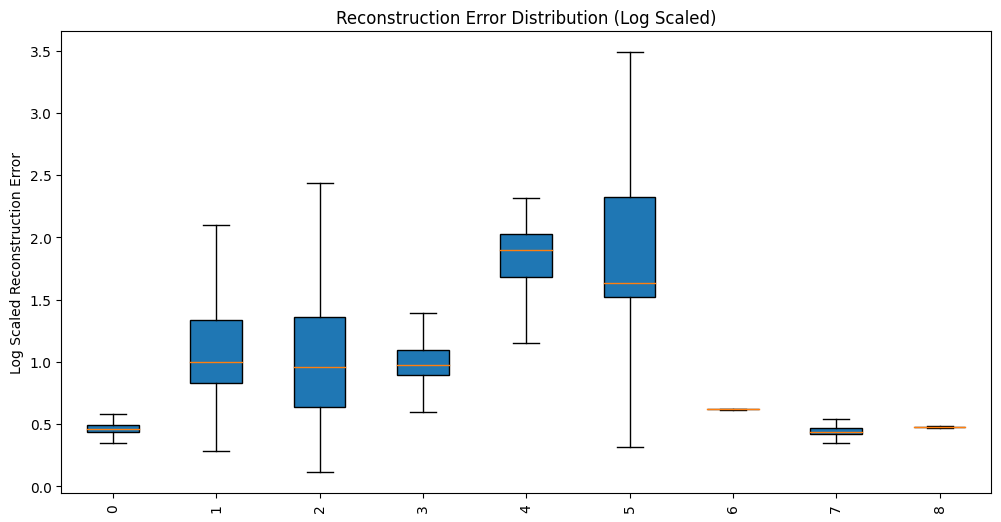

In [35]:
import numpy as np

# Reconstruction Error가 0보다 작아지는 것을 방지하기 위해 작은 값 추가
error_df["log_reconstruction_error"] = np.log1p(error_df["reconstruction_error"])

plt.figure(figsize=(12, 6))
plt.boxplot(
    [error_df["log_reconstruction_error"][error_df["true_class"] == cls] for cls in sorted(error_df["true_class"].unique())],
    labels=sorted(error_df["true_class"].unique()),
    showfliers=False,
    vert=True,
    patch_artist=True
)
plt.ylabel("Log Scaled Reconstruction Error")
plt.xticks(rotation=90)
plt.title("Reconstruction Error Distribution (Log Scaled)")
plt.show()

In [36]:
def classify_error_dynamic(error_value):
    min_diff = float("inf")
    best_class = 0  # 기본값 (정상)
    
    for cls, thresh in thresholds.items():
        diff = abs(error_value - thresh)
        if diff < min_diff:
            min_diff = diff
            best_class = cls
            
    return best_class

# ✅ 새로운 분류 적용
error_df['pred_class_dynamic'] = error_df['reconstruction_error'].apply(classify_error_dynamic)

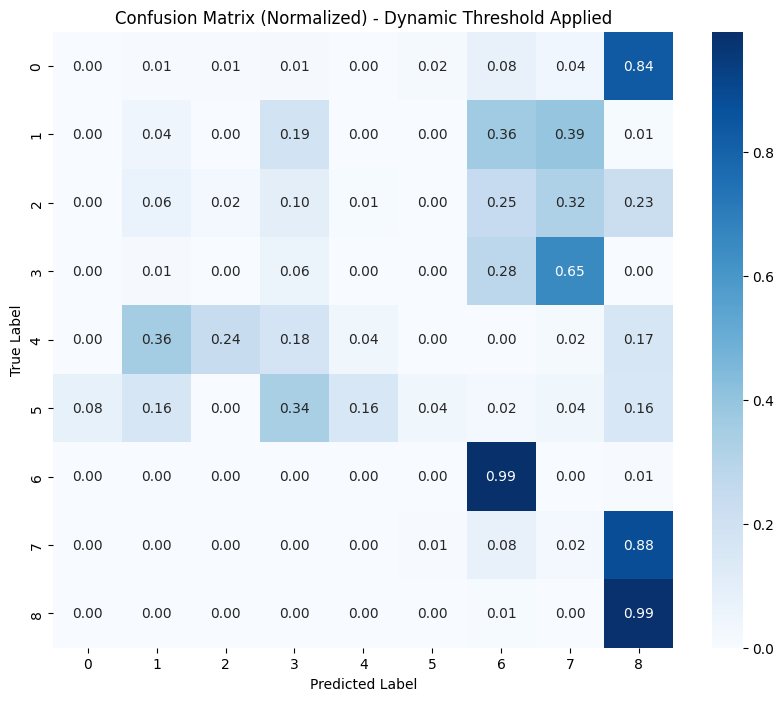

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ✅ 새로운 분류 결과 기반 혼동 행렬 생성
cm = confusion_matrix(error_df['true_class'], error_df['pred_class_dynamic'], labels=sorted(error_df['true_class'].unique()))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 정규화

# ✅ Confusion Matrix 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=sorted(error_df['true_class'].unique()), yticklabels=sorted(error_df['true_class'].unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - Dynamic Threshold Applied")
plt.show()

In [38]:
import numpy as np

# ✅ 클래스별 Reconstruction Error Threshold 계산
thresholds = {}

for label in sorted(error_df['true_class'].unique()):  # 0(정상) + 8개 공격
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error'].values
    
    if len(class_errors) > 10:  # 최소 샘플 개수 확인
        thresholds[label] = {
            "p95": np.percentile(class_errors, 95),
            "p98": np.percentile(class_errors, 98),
            "p99": np.percentile(class_errors, 99)
        }
    else:
        thresholds[label] = {
            "p95": np.percentile(error_df['reconstruction_error'], 95),
            "p98": np.percentile(error_df['reconstruction_error'], 98),
            "p99": np.percentile(error_df['reconstruction_error'], 99)
        }

print("📌 새롭게 계산된 Threshold 값:", thresholds)

📌 새롭게 계산된 Threshold 값: {0: {'p95': 3.284914738234613, 'p98': 10.833479267233898, 'p99': 28.238789210557247}, 1: {'p95': 4.722424704038044, 'p98': 5.471789535247676, 'p99': 5.509586464783895}, 2: {'p95': 6.017807734270972, 'p98': 7.640811411424759, 'p99': 8.466698445234991}, 3: {'p95': 3.2823235686857495, 'p98': 4.065642522061923, 'p99': 4.9528998789220635}, 4: {'p95': 6.7115700984697195, 'p98': 8.368099391146364, 'p99': 8.788699584165963}, 5: {'p95': 11.245946167580176, 'p98': 13.718560373827252, 'p99': 13.861440506647584}, 6: {'p95': 0.8623960387164993, 'p98': 0.8635290748602823, 'p99': 0.8642946444450831}, 7: {'p95': 1.3451028077285685, 'p98': 2.090879106827223, 'p99': 6.130771037871146}, 8: {'p95': 0.6308118165833753, 'p98': 0.644197680500971, 'p99': 0.7564329306027582}}


In [39]:
def classify_error_multi_threshold(error_value):
    min_diff = float("inf")
    best_class = 0  # 기본값 (정상)
    
    for cls, thresh in thresholds.items():
        # ✅ 여러 개의 Threshold 중 가장 가까운 값으로 선택
        closest_threshold = min(thresh.values(), key=lambda x: abs(x - error_value))
        diff = abs(error_value - closest_threshold)
        
        if diff < min_diff:
            min_diff = diff
            best_class = cls
            
    return best_class

# ✅ 새로운 분류 적용
error_df['pred_class_multi'] = error_df['reconstruction_error'].apply(classify_error_multi_threshold)

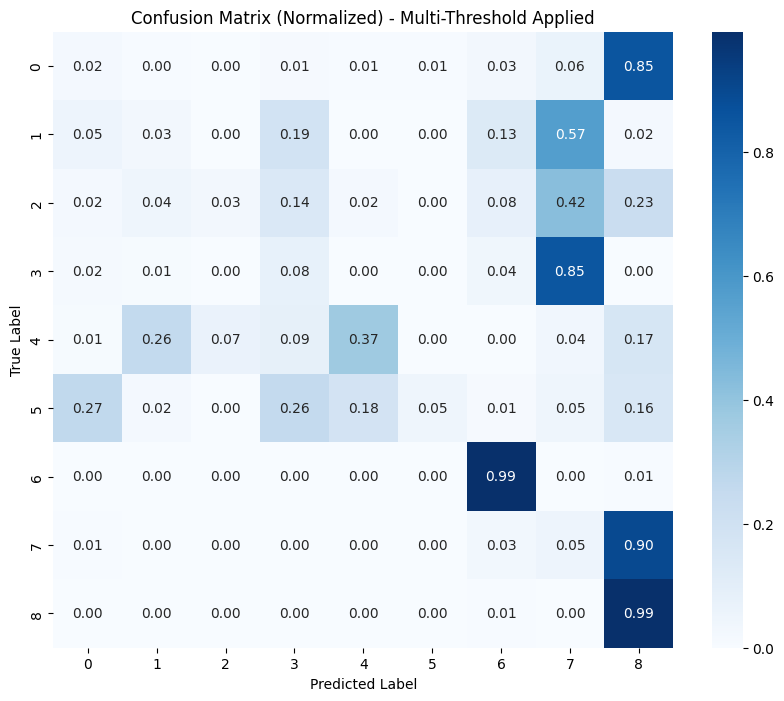

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ✅ 새로운 분류 결과 기반 혼동 행렬 생성
cm = confusion_matrix(error_df['true_class'], error_df['pred_class_multi'], labels=sorted(error_df['true_class'].unique()))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 정규화

# ✅ Confusion Matrix 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=sorted(error_df['true_class'].unique()), yticklabels=sorted(error_df['true_class'].unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - Multi-Threshold Applied")
plt.show()